In [1]:
import jax.numpy as jnp
import numpy as np
import ppptm as gptm
import plotnine as p9
import jax

In [2]:
jax.config.update("jax_enable_x64", True)

In [3]:
locs = gptm.unit_grid_vars(n_subset=100)
gptm.GPTMCoef.sample_df(locs=locs)

,lon,lat,loc,D,sample,value
0,0.444444,0.444444,0,0,0,-0.042534
1,0.444444,0.444444,0,1,0,-0.194290
2,0.444444,0.444444,0,2,0,-0.379238
3,0.444444,0.444444,0,3,0,-0.474002
4,0.444444,0.444444,0,4,0,-0.430949
...,...,...,...,...,...,...
495,1.000000,0.666667,99,0,0,-0.062991
496,1.000000,0.666667,99,1,0,-0.086834
497,1.000000,0.666667,99,2,0,-0.078472
498,1.000000,0.666667,99,3,0,-0.046243


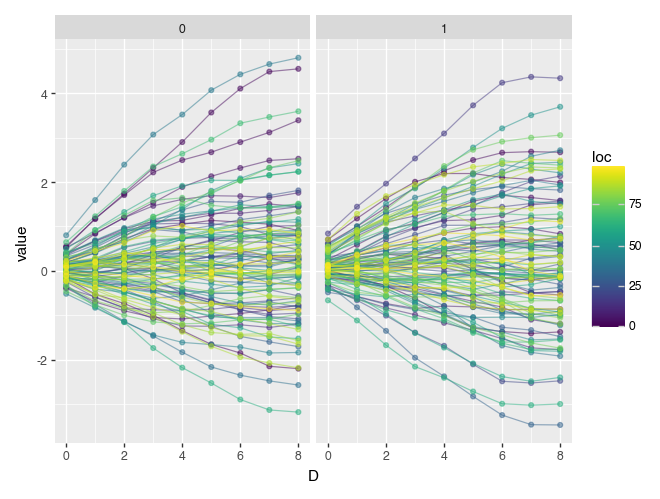

In [4]:
df = gptm.GPTMCoef.sample_df(locs=locs, n=2, nparam=9, seed=2)
(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("D", "value", group="loc", color="loc"), alpha=0.5)
    + p9.geom_point(p9.aes("D", "value", color="loc"), alpha=0.5)
    + p9.facet_wrap("~sample")
)

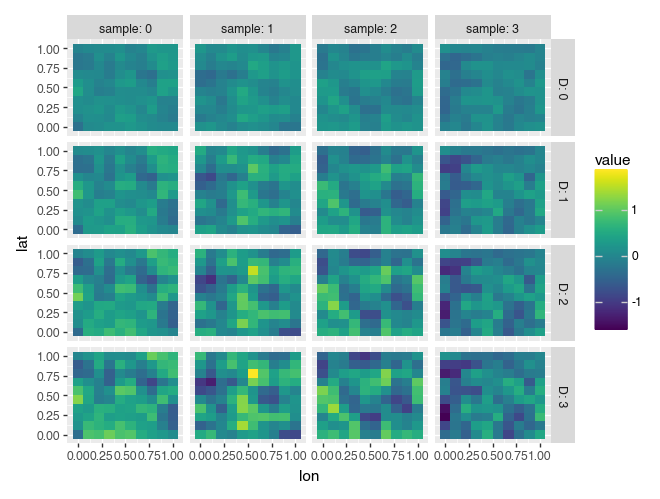

In [5]:
df = gptm.GPTMCoef.sample_df(locs=locs, n=4, nparam=4, seed=2)
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_grid("D~sample", labeller="label_both")
)

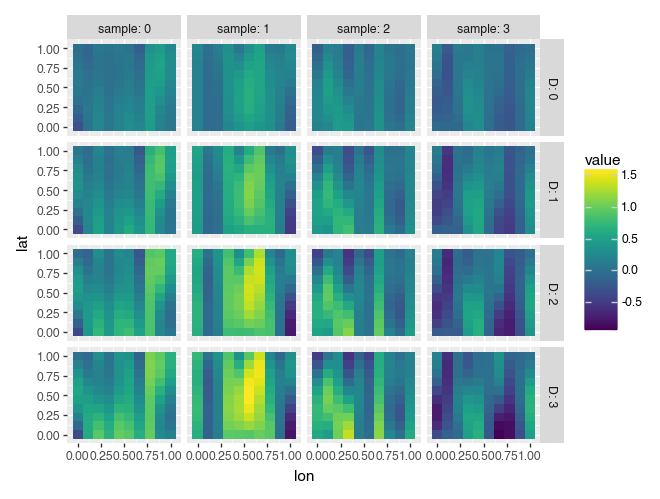

In [6]:
df = gptm.GPTMCoef.sample_df(
    locs=locs, n=4, nparam=4, seed=2, length_scale=jnp.array([0.1, 0.5])
)
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_grid("D~sample", labeller="label_both")
)

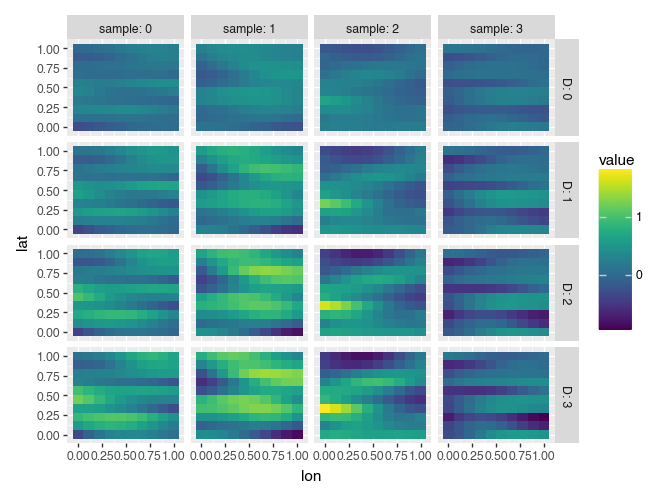

In [7]:
df = gptm.GPTMCoef.sample_df(
    locs=locs, n=4, nparam=4, seed=2, length_scale=jnp.array([0.5, 0.1])
)
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_grid("D~sample", labeller="label_both")
)

In [8]:
amp = locs.ordered.value[:, 0] + 3 * locs.ordered.value[:, 1]

In [9]:
df = gptm.GPTMCoef.sample_df(locs=locs, n=4, nparam=4, seed=2, amplitude=amp)
df

,lon,lat,loc,D,sample,value
0,0.444444,0.444444,0,0,0,1.627142
1,0.444444,0.444444,0,1,0,3.750949
2,0.444444,0.444444,0,2,0,7.576252
3,0.444444,0.444444,0,3,0,9.915736
4,1.000000,1.000000,1,0,0,9.695290
...,...,...,...,...,...,...
1595,0.888889,0.666667,98,3,3,-18.316146
1596,1.000000,0.666667,99,0,3,3.897987
1597,1.000000,0.666667,99,1,3,6.586391
1598,1.000000,0.666667,99,2,3,9.488700


In [10]:
var_df = df.groupby(["loc", "lon", "lat"])["value"].var().reset_index()
var_df

,loc,lon,lat,value
0,0,0.444444,0.444444,35.802936
1,1,1.000000,1.000000,73.422236
2,2,0.000000,1.000000,113.756772
3,3,1.000000,0.000000,19.723177
4,4,0.000000,0.000000,0.000000
...,...,...,...,...
95,95,0.777778,0.000000,3.680560
96,96,0.777778,0.444444,70.656683
97,97,0.777778,0.666667,123.200136
98,98,0.888889,0.666667,131.363861


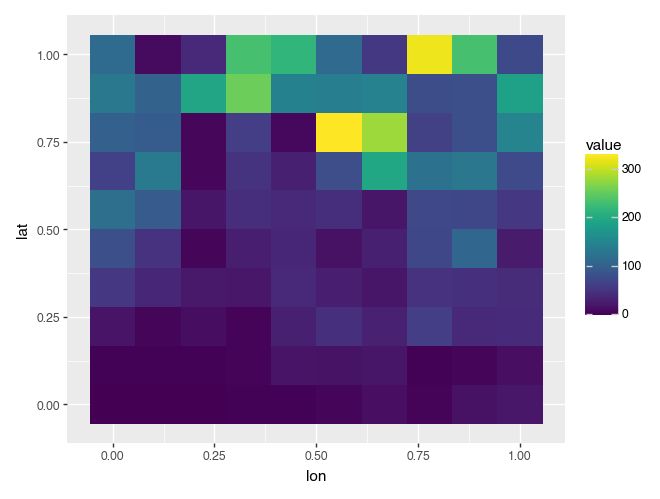

In [11]:
(p9.ggplot(var_df) + p9.geom_tile(p9.aes("lon", "lat", fill="value")))

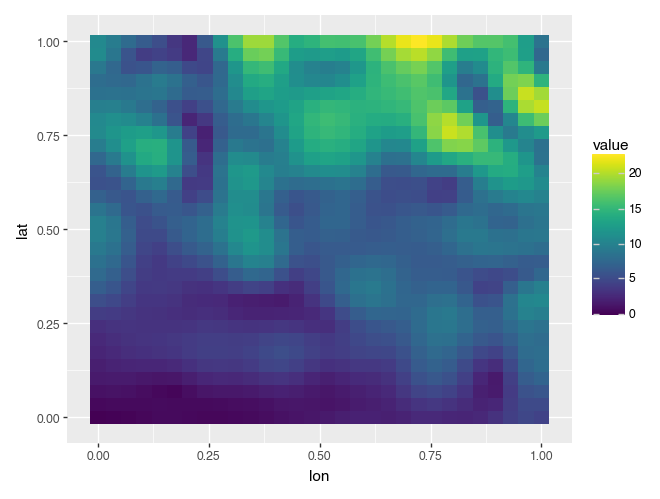

In [12]:
locs = gptm.unit_grid_vars(ngrid=30, n_subset=300)
amp = locs.ordered.value[:, 0] + 3 * locs.ordered.value[:, 1]
df = gptm.GPTMCoef.sample_df(locs=locs, n=4, nparam=4, seed=2, amplitude=amp)
var_df = df.groupby(["loc", "lon", "lat"])["value"].var().reset_index()
var_df["value"] = np.sqrt(var_df["value"])
(p9.ggplot(var_df) + p9.geom_tile(p9.aes("lon", "lat", fill="value")))